### Team: Valiant Vaccinators
### Analyzing the Correlation between Covid Vaccinations and Infection/Death Rates

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 

# Reading Dataset

In [2]:
covid_national = pd.read_csv(r"./covidnational.csv")
covid_national.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,USA,North America,United States,3/5/2020,184,77,23.857,12,1,1.714,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
1,USA,North America,United States,3/6/2020,237,53,31.429,14,2,2.000,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
2,USA,North America,United States,3/7/2020,403,166,54.000,17,3,2.286,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
3,USA,North America,United States,3/8/2020,519,116,69.571,21,4,2.857,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,4.38
4,USA,North America,United States,3/9/2020,594,75,77.000,22,1,2.286,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


# Data Cleaning

In [3]:
covid_national = covid_national.drop(["iso_code", "continent", "location", "weekly_icu_admissions", "weekly_icu_admissions_per_million", "weekly_hosp_admissions", "weekly_hosp_admissions_per_million", "tests_units", "excess_mortality", "handwashing_facilities", "population_density", "aged_65_older", "gdp_per_capita", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers", "hospital_beds_per_thousand", "life_expectancy", "human_development_index", "stringency_index", "population", "median_age", "aged_70_older", "extreme_poverty"], axis = 1)
covid_national.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million
0,3/5/2020,184,77,23.857,12,1,1.714,0.556,0.233,0.072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/6/2020,237,53,31.429,14,2,2.000,0.716,0.160,0.095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/7/2020,403,166,54.000,17,3,2.286,1.218,0.502,0.163,...,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/8/2020,519,116,69.571,21,4,2.857,1.568,0.350,0.210,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/9/2020,594,75,77.000,22,1,2.286,1.795,0.227,0.233,...,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covid_national.shape

(486, 35)

# Data Visualization

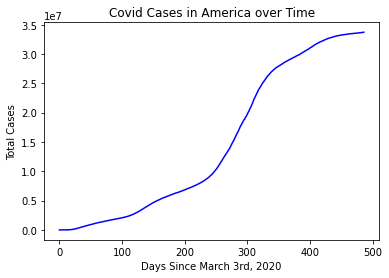

In [5]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Total Cases')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Cases in America over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["total_cases"], 'b')

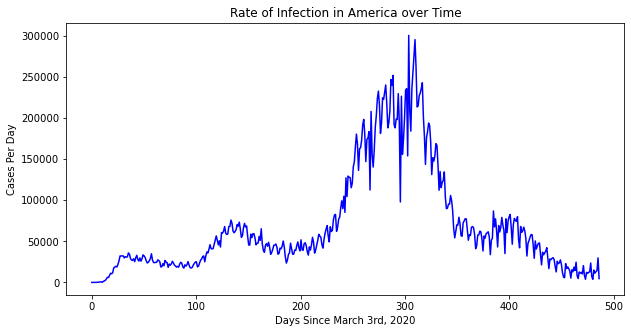

In [6]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Cases Per Day')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Rate of Infection in America over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["new_cases"], 'b')

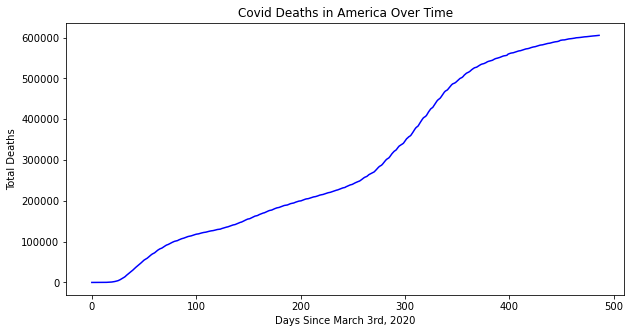

In [7]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Total Deaths')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Deaths in America Over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["total_deaths"], 'b')

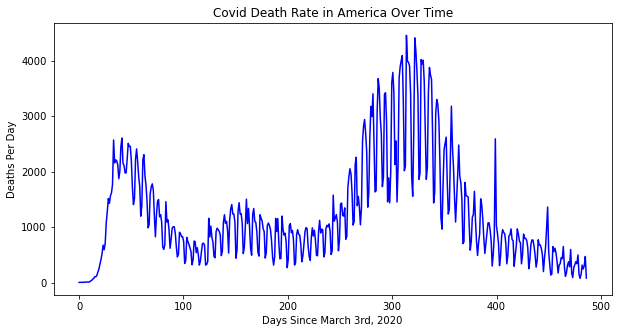

In [8]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Deaths Per Day')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Death Rate in America Over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["new_deaths"], 'b')

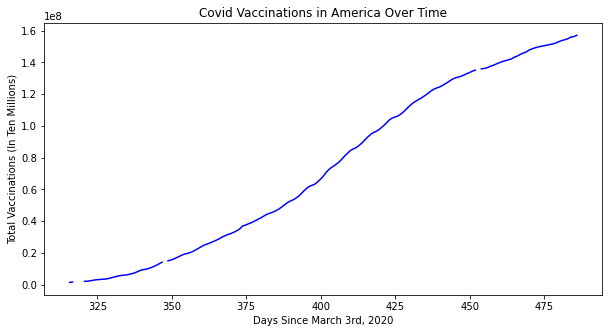

In [9]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Total Vaccinations (In Ten Millions)')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Vaccinations in America Over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["people_fully_vaccinated"], 'b')

<AxesSubplot:>

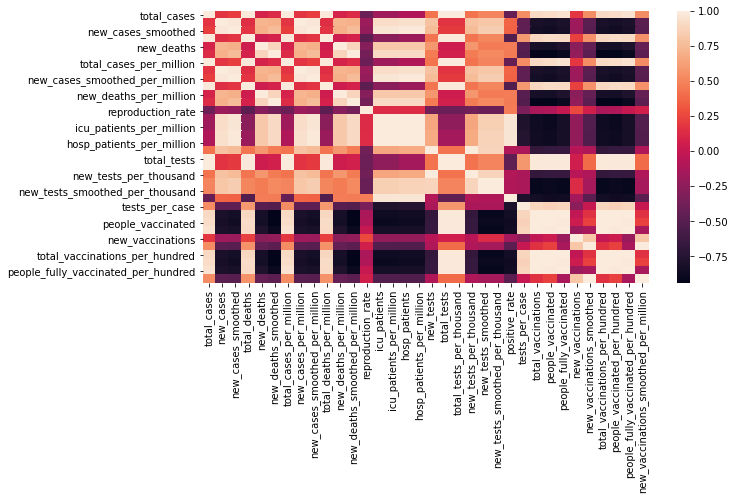

In [10]:
sns.heatmap(covid_national.corr())

# Visualizing Correlation Between Vaccinations and Infection/Death Rates

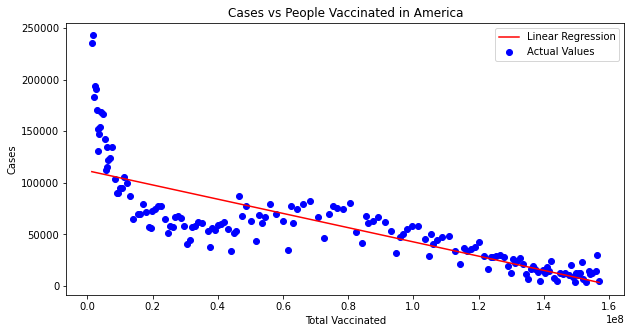

In [11]:
plt.ylabel('Cases')
plt.xlabel('Total Vaccinated')
plt.title('Cases vs People Vaccinated in America')
covid_national = covid_national.dropna()
plt.scatter(covid_national["people_fully_vaccinated"], covid_national["new_cases"], c = "b")
y = np.array(covid_national["new_cases"])
x = np.array(covid_national["people_fully_vaccinated"])
res = stats.linregress(x,y)
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.legend(["Linear Regression", "Actual Values"])
plt.show()

In [12]:
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"R-value: {res.rvalue:.6f}")

R-squared: 0.638530
R-value: -0.799081


In [13]:
print(covid_national["people_fully_vaccinated"].corr(covid_national["new_cases"]))

-0.7990808576491994


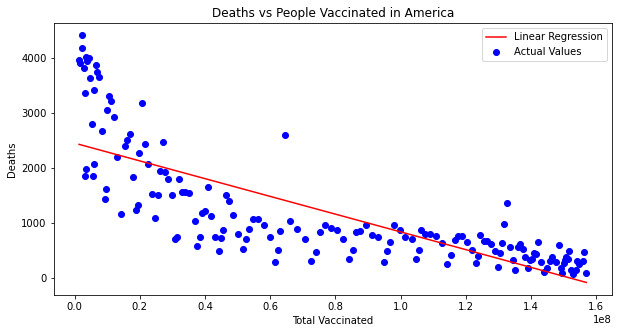

In [14]:
plt.ylabel('Deaths')
plt.xlabel('Total Vaccinated')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Deaths vs People Vaccinated in America')
covid_national = covid_national.dropna()
plt.scatter(covid_national["people_fully_vaccinated"], covid_national["new_deaths"], c = "b")
y = np.array(covid_national["new_deaths"])
x = np.array(covid_national["people_fully_vaccinated"])
res = stats.linregress(x,y)
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.legend(["Linear Regression", "Actual Values"])

In [15]:
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"R-value: {res.rvalue:.6f}")

R-squared: 0.613742
R-value: -0.783417


In [16]:
print(covid_national["people_fully_vaccinated"].corr(covid_national["new_deaths"]))

-0.7834169484770184


# Training a Regression Model to Predict Future Deaths

In [17]:
covid_national_temp = covid_national.dropna()
X = covid_national_temp.filter(['people_fully_vaccinated', 'positive_rate', 'new_cases'])
y = covid_national_temp['new_deaths']

In [18]:
X.head()

,people_fully_vaccinated,positive_rate,new_cases
315,1342086.0,0.126,235766
316,1610524.0,0.121,242780
321,2161419.0,0.109,183261
322,2394961.0,0.107,193856
323,2756953.0,0.104,190760


In [19]:
y.head()

315    3970
316    3908
321    4416
322    4185
323    3823
Name: new_deaths, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
regressor = knn_reg.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 237.23636363636362
Mean Squared Error: 139826.37333333332
Root Mean Squared Error: 373.9336483031894


# Improving the Model

In [22]:
covid_national_temp.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million
count,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,...,163.000000,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000,163.000000
mean,3.062357e+07,59576.085890,62256.352301,546312.319018,1229.625767,1251.186656,92517.585914,179.986718,188.08411,1650.477172,...,26.931288,1.795991e+08,1.078190e+08,7.567289e+07,1.916885e+06,1.897226e+06,53.700982,32.238528,22.626442,5672.809816
std,2.687818e+06,45439.904457,46548.732697,53618.456036,1086.685884,960.304540,8120.230496,137.279551,140.62951,161.988046,...,13.295727,1.054287e+08,5.673543e+07,5.268550e+07,8.980587e+05,7.393331e+05,31.523815,16.963720,15.753337,2210.629070
min,2.339383e+07,3892.000000,11299.286000,395937.000000,74.000000,233.714000,70675.667000,11.758000,34.13700,1196.175000,...,7.900000,1.114899e+07,9.690757e+06,1.342086e+06,5.086520e+05,7.150440e+05,3.330000,2.900000,0.400000,2138.000000
25%,2.873808e+07,26631.500000,26437.928500,517458.500000,489.000000,578.071000,86821.315000,80.457000,79.87200,1563.306000,...,18.900000,7.776579e+07,5.124422e+07,2.581426e+07,1.205452e+06,1.265090e+06,23.250000,15.325000,7.715000,3782.500000
50%,3.120142e+07,55519.000000,57573.143000,562446.000000,795.000000,820.571000,94263.340000,167.730000,173.93600,1699.219000,...,22.700000,1.870471e+08,1.192429e+08,7.263089e+07,1.738102e+06,1.817502e+06,55.930000,35.650000,21.720000,5434.000000
75%,3.309848e+07,74528.500000,68380.857000,589363.000000,1595.000000,1898.786000,99994.602000,225.160000,206.58700,1780.538500,...,35.700000,2.827683e+08,1.618746e+08,1.283924e+08,2.432534e+06,2.493957e+06,84.550000,48.400000,38.390000,7457.000000
max,3.371406e+07,242780.000000,239619.571000,605493.000000,4416.000000,3420.571000,101854.364000,733.468000,723.92000,1829.269000,...,55.600000,3.299706e+08,1.821099e+08,1.569825e+08,4.629928e+06,3.384387e+06,98.660000,54.450000,46.940000,10120.000000


In [23]:
min_threshold, max_threshold = covid_national_temp.new_deaths.quantile([0.1, 0.8])
min_threshold, max_threshold

(291.4, 1934.6)

In [24]:
covid_national_normal = covid_national_temp[covid_national_temp.new_deaths < max_threshold]

In [25]:
covid_national_normal.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million
325,1/24/2021,25206050,131198,169949.714,427082,1862,3131.714,76150.599,396.365,513.439,...,10.1,21848655.0,18502131.0,3216836.0,1310665.0,1122182.0,6.53,5.53,0.96,3355.0
332,1/31/2021,26249342,112152,149041.714,449340,1862,3179.714,79302.514,338.825,450.273,...,11.4,31123299.0,25201143.0,5657142.0,1545397.0,1324949.0,9.31,7.54,1.69,3962.0
339,2/7/2021,27073661,89746,117759.857,470257,1436,2988.143,81792.884,271.134,355.767,...,13.3,41210937.0,31579100.0,9147185.0,2172973.0,1441091.0,12.32,9.44,2.74,4309.0
340,2/8/2021,27164099,90438,111397.429,471877,1620,2922.429,82066.108,273.224,336.545,...,14.1,42417617.0,32340146.0,9518015.0,1206680.0,1456459.0,12.68,9.67,2.85,4355.0
346,2/14/2021,27712402,65135,91248.714,487741,1171,2497.714,83722.599,196.781,275.674,...,14.7,52884356.0,38292270.0,14077440.0,2242472.0,1667631.0,15.81,11.45,4.21,4986.0


In [26]:
X = covid_national_normal.filter(['people_fully_vaccinated', 'positive_rate', 'new_cases'])
y = covid_national_normal['new_deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
knn_reg = KNeighborsRegressor(n_neighbors=10)
regressor = knn_reg.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 168.70000000000002
Mean Squared Error: 46746.052307692305
Root Mean Squared Error: 216.208353926698
